# KELOMPOK 3 RA

## 1. Mujadid Choirus Surya		121450015
## 2. Pramudya Wibowo		    121450030
## 3. A Rafi Paringgom Iwari	121450039
## 4. Veni Zahara Kartika		121450075
## 5. M. Faqih				    121450120

In [133]:
import numpy as np
import pandas as pd #library untuk analisis data dan manipulasi data

# Data Preprocessing

## Dataset 1

In [134]:
df1 = pd.read_csv('beer_reviews.csv') # menggunakan fungsi dari library dari pandas untuk membaca dataset
df1.head() #fungsi .head untuk melihat baris paling atas pada dataset

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [135]:
df1.info() #fungsi .info untuk melihat informasi dari dataset seperti ukuran dataset, nilai null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [136]:
# Dapatkan nilai rata-rata skor untuk setiap minuman dan buat DataFrame baru bernama `df_scores`
# Hapus kolom yang tidak diperlukan (metadata) dan hitung nilai rata-rata skor ulasan untuk setiap kombinasi unik dari nama pembuat bir dan nama bir
df_scores = df1.drop(['brewery_id', 
                             'review_time', 
                             'review_profilename', 
                             'beer_style', 
                             'beer_beerid', 
                             'beer_abv'], 
                            axis=1).groupby(by=['brewery_name', 
                                                'beer_name'], 
                                            as_index = False).mean()
# Membuat DataFrame baru df_scores yang berisi nilai rata-rata dari kolom 'review_overall' untuk setiap kombinasi unik dari nama pembuat bir dan nama bir. 
# Langkah ini menghasilkan DataFrame baru dengan kolom 'brewery_name', 'beer_name', dan 'review_overall' yang berisi nilai rata-rata dari ulasan untuk masing-masing kombinasi bir dan pembuat bir.

# Ambil kolom 'review_overall' yang merepresentasikan jumlah ulasan
df_scores_count = df1.drop(['brewery_id', 'review_time', 'review_profilename', 'beer_style', 'beer_beerid', 'beer_abv'], axis=1).groupby(by=['brewery_name', 'beer_name'], as_index=False).count()
# Membuat DataFrame baru df_scores_count yang berisi jumlah ulasan untuk setiap kombinasi unik dari nama pembuat bir dan nama bir.
df_scores_count = df_scores_count['review_overall']

# Gabungkan informasi menjadi satu DataFrame
# Tambahkan kolom 'number_of_reviews' ke DataFrame df_scores
df_scores['number_of_reviews'] = df_scores_count
df_scores.head()

,brewery_name,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews
0,'t Hofbrouwerijke,Blondelle,4.000000,4.500000,3.500000,4.000000,4.000000,1
1,'t Hofbrouwerijke,Bosprotter,3.722222,3.833333,3.666667,3.611111,3.777778,9
2,'t Hofbrouwerijke,Hof Korvatunturi,3.750000,4.000000,3.750000,3.500000,3.750000,2
3,'t Hofbrouwerijke,Hofblues,3.812500,3.812500,4.000000,3.625000,3.593750,16
4,'t Hofbrouwerijke,Hofdraak,3.357143,3.428571,3.714286,3.142857,3.428571,7


### Missing Value

In [137]:
df_scores.isnull().sum() #mencari nilai kosong lalu menjumlahkan nilai kosong tersebut untuk menghitung nilai missing value

brewery_name         0
beer_name            0
review_overall       0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
number_of_reviews    0
dtype: int64

### Duplicate Data

In [138]:
df_scores.duplicated().sum() # mencari data/baris duplicate lalu menghitung jumlah data duplicate

0

In [139]:
# Buat kolom identifikasi baru di `df_scores` bernama 'beer_name_full'
# Isi kolom ini dengan menggabungkan `brewery_name` dan `beer_name`
df_scores['beer_name_full'] = df_scores['brewery_name'] + ' ' + df_scores['beer_name']

# Periksa apakah semua nama minuman yang dihasilkan dalam df_scores bersifat unik
df_scores['beer_name_full'].nunique() == len(df_scores.index)

True

In [140]:
df_scores.head() #fungsi .head untuk melihat baris paling atas pada dataset

,brewery_name,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews,beer_name_full
0,'t Hofbrouwerijke,Blondelle,4.000000,4.500000,3.500000,4.000000,4.000000,1,'t Hofbrouwerijke Blondelle
1,'t Hofbrouwerijke,Bosprotter,3.722222,3.833333,3.666667,3.611111,3.777778,9,'t Hofbrouwerijke Bosprotter
2,'t Hofbrouwerijke,Hof Korvatunturi,3.750000,4.000000,3.750000,3.500000,3.750000,2,'t Hofbrouwerijke Hof Korvatunturi
3,'t Hofbrouwerijke,Hofblues,3.812500,3.812500,4.000000,3.625000,3.593750,16,'t Hofbrouwerijke Hofblues
4,'t Hofbrouwerijke,Hofdraak,3.357143,3.428571,3.714286,3.142857,3.428571,7,'t Hofbrouwerijke Hofdraak


## Dataset 2

In [141]:
df2 = pd.read_csv('beer_dataset.csv') # menggunakan fungsi dari library dari pandas untuk membaca dataset
df2.head() #fungsi .head untuk melihat baris paling atas pada dataset

,Unnamed: 0,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,...,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_review_exists,Beer Name (Full),beer_review_exists
0,0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,...,74,33,0,33,57,8,111,1,Alaskan Brewing Co. Alaskan Amber,1
1,1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,...,55,16,0,24,35,12,84,1,Long Trail Brewing Co. Double Bag,1
2,2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,...,43,11,0,10,54,4,62,1,Long Trail Brewing Co. Long Trail Ale,1
3,3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Notes:,8.5,4.15,25,...,101,18,1,49,40,16,119,1,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,1
4,5,Sleigh'r Dark Doüble Alt Ale,256,Altbier,8,Ninkasi Brewing Company,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,3.78,25,...,45,9,1,11,51,20,95,1,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,1


In [142]:
df2.info() #fungsi .info untuk melihat informasi dari dataset seperti ukuran dataset, nilai null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3197 non-null   int64  
 1   Name                   3197 non-null   object 
 2   key                    3197 non-null   int64  
 3   Style                  3197 non-null   object 
 4   Style Key              3197 non-null   int64  
 5   Brewery                3197 non-null   object 
 6   Description            3197 non-null   object 
 7   ABV                    3197 non-null   float64
 8   Ave Rating             3197 non-null   float64
 9   Min IBU                3197 non-null   int64  
 10  Max IBU                3197 non-null   int64  
 11  Astringency            3197 non-null   int64  
 12  Body                   3197 non-null   int64  
 13  Alcohol                3197 non-null   int64  
 14  Bitter                 3197 non-null   int64  
 15  Swee

### Missing Value

In [143]:
df2.isnull().sum() # mencari nilai kosong lalu menjumlahkan nilai kosong tersebut untuk menghitung nilai missing value

Unnamed: 0               0
Name                     0
key                      0
Style                    0
Style Key                0
Brewery                  0
Description              0
ABV                      0
Ave Rating               0
Min IBU                  0
Max IBU                  0
Astringency              0
Body                     0
Alcohol                  0
Bitter                   0
Sweet                    0
Sour                     0
Salty                    0
Fruits                   0
Hoppy                    0
Spices                   0
Malty                    0
brewery_review_exists    0
Beer Name (Full)         0
beer_review_exists       0
dtype: int64

### Duplicate Data

In [144]:
df2.duplicated().sum() # mencari data/baris duplicate lalu menghitung jumlah data duplicate

0

# Data Integration

In [145]:
# Hapus kolom yang tidak diperlukan lagi pada setiap dataset
df2.drop(['Unnamed: 0','Description','key', 'Style Key', 'brewery_review_exists', 'beer_review_exists', 'Ave Rating'], axis=1, inplace=True)
df_scores.drop(['brewery_name', 'beer_name'], axis=1, inplace=True)

# Mengganti nama kolom menggunakan fungsi .renama
df_scores.rename(columns={"beer_name_full": "Beer Name (Full)"}, inplace=True)
# Kolom "beer_name_full" diganti menjadi "Beer Name (Full)"

In [146]:
# Menggabungkan 2 dataset (df2 dan df_scores) dengan menggunakan fungsi .merge 
# dimana kolom Beer Name (Full) menjadi penghubung dan disimpan kedalam df_final
df_final = pd.merge(df2, df_scores, how='left', on=['Beer Name (Full)'])

In [147]:
df_final.head() #fungsi .head untuk melihat baris paling atas pada dataset

,Name,Style,Brewery,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,...,Hoppy,Spices,Malty,Beer Name (Full),review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,5.3,25,50,13,32,9,47,...,57,8,111,Alaskan Brewing Co. Alaskan Amber,3.847082,3.498994,3.636821,3.556338,3.643863,497.0
1,Double Bag,Altbier,Long Trail Brewing Co.,7.2,25,50,12,57,18,33,...,35,12,84,Long Trail Brewing Co. Double Bag,4.034304,3.798337,3.846154,3.904366,4.024948,481.0
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,5.0,25,50,14,37,6,42,...,54,4,62,Long Trail Brewing Co. Long Trail Ale,3.830239,3.409814,3.667109,3.600796,3.631300,377.0
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,8.5,25,50,13,55,31,47,...,40,16,119,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,4.005435,4.148098,4.033967,4.150815,4.205163,368.0
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,7.2,25,50,25,51,26,44,...,51,20,95,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,3.817708,3.625000,3.973958,3.734375,3.765625,96.0


In [148]:
df_final.info() #fungsi .info untuk melihat informasi dari dataset seperti ukuran dataset, nilai null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3197 entries, 0 to 3196
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   ABV                3197 non-null   float64
 4   Min IBU            3197 non-null   int64  
 5   Max IBU            3197 non-null   int64  
 6   Astringency        3197 non-null   int64  
 7   Body               3197 non-null   int64  
 8   Alcohol            3197 non-null   int64  
 9   Bitter             3197 non-null   int64  
 10  Sweet              3197 non-null   int64  
 11  Sour               3197 non-null   int64  
 12  Salty              3197 non-null   int64  
 13  Fruits             3197 non-null   int64  
 14  Hoppy              3197 non-null   int64  
 15  Spices             3197 non-null   int64  
 16  Malty              3197 

# Data Discretization

In [149]:
df_final['levels']=pd.cut(df_final['review_overall'],5,labels=['Very Poor','Poor','Fair','Good','Excellent'])
# 5 mewakili jumlah kategori levels yang akan digunakan
# label diisi sesuai dengan lima nilai: 'Very Poor','Poor','Fair','Good','Excellent'.

In [150]:
df_final.head() #fungsi .head untuk melihat baris paling atas pada dataset

,Name,Style,Brewery,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,...,Spices,Malty,Beer Name (Full),review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews,levels
0,Amber,Altbier,Alaskan Brewing Co.,5.3,25,50,13,32,9,47,...,8,111,Alaskan Brewing Co. Alaskan Amber,3.847082,3.498994,3.636821,3.556338,3.643863,497.0,Good
1,Double Bag,Altbier,Long Trail Brewing Co.,7.2,25,50,12,57,18,33,...,12,84,Long Trail Brewing Co. Double Bag,4.034304,3.798337,3.846154,3.904366,4.024948,481.0,Good
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,5.0,25,50,14,37,6,42,...,4,62,Long Trail Brewing Co. Long Trail Ale,3.830239,3.409814,3.667109,3.600796,3.631300,377.0,Good
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,8.5,25,50,13,55,31,47,...,16,119,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,4.005435,4.148098,4.033967,4.150815,4.205163,368.0,Good
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,7.2,25,50,25,51,26,44,...,20,95,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,3.817708,3.625000,3.973958,3.734375,3.765625,96.0,Good


# Transformasi Data

In [151]:
df_final.select_dtypes(exclude=[np.number]) # Memilih variabel dengan tipe data kecuali variabel dengan tipe data numerik

,Name,Style,Brewery,Beer Name (Full),levels
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,Good
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,Good
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Good
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Good
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Good
...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Good
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Good
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Good
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Good


### Menghitung nilai masing-masing dari kolom kategorik

In [152]:
df_final['Style'].value_counts()


Lager - Adjunct                    45
Lager - European Pale              43
Wheat Beer - Hefeweizen            42
Stout - Irish Dry                  42
Lambic - Fruit                     42
                                   ..
Bière de Champagne / Bière Brut     8
Lager - India Pale Lager (IPL)      6
IPA - New England                   4
Brett Beer                          3
Sour - Gose                         3
Name: Style, Length: 111, dtype: int64

In [153]:
df_final['Name'].value_counts()

Oktoberfest                                 12
Porter                                      10
Smoked Porter                                9
Christmas Ale                                6
IPA                                          5
                                            ..
Vinyl                                        1
Barking Squirrel Lager                       1
Redbridge                                    1
ZiegenBock Amber                             1
Frosted Frog Christmas Ale - Barrel-Aged     1
Name: Name, Length: 3067, dtype: int64

In [154]:
df_final['Brewery'].value_counts()

Boston Beer Company (Samuel Adams)    40
Dogfish Head Brewery                  31
Anheuser-Busch                        30
Three Floyds Brewing Co. & Brewpub    29
Victory Brewing Company               23
                                      ..
Asia Pacific Breweries Ltd.            1
Boon Rawd Brewery Co., Ltd             1
Birra Moretti (Heineken)               1
Stella Artois                          1
Natty Greene's Pub & Brewing Co.       1
Name: Brewery, Length: 934, dtype: int64

In [155]:
df_final['Beer Name (Full)'].value_counts()

Alaskan Brewing Co. Alaskan Amber                                 1
Ranger Creek Brewing & Distilling Mesquite Smoked Porter - MSP    1
Grey Sail Brewing of Rhode Island Leaning Chimney Porter          1
8 Wired Brewing Co. The Big Smoke                                 1
East End Brewing Company Smokestack Heritage Porter               1
                                                                 ..
Anheuser-Busch Redbridge                                          1
Anheuser-Busch ZiegenBock Amber                                   1
August Schell Brewing Company Grain Belt Nordeast                 1
Capital Brewery Wisconsin Amber                                   1
Hoppin' Frog Brewery Barrel Aged Frosted Frog Christmas Ale       1
Name: Beer Name (Full), Length: 3197, dtype: int64

In [156]:
df_final['levels'].value_counts()


Good         2338
Fair          472
Excellent     265
Poor           99
Very Poor      12
Name: levels, dtype: int64

In [157]:
data_column_category =df_final.select_dtypes(exclude=[np.number]).columns # Memilih variabel dengan tipe data kecuali variabel dengan tipe data numerik lalu disimpan pada df_categorical_column
data_column_category

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'levels'], dtype='object')

## Data Encoding

In [158]:
# Menggunakan fungsi replace untuk melakukan data encoding yaitu mengubah data yang berbentuk kategorik menjadi numerik
df_final.levels.replace({'Very Poor':1, 'Poor':2, 'Fair':3, 'Good':4, 'Excellent':5}, inplace=True)
# Pada kolom levels nilai 'Very Poor'menjadi 1, 'Poor'menjadi 2, 'Fair'menjadi 3, 'Good'menjadi 4, 'Excellent'menjadi 5

## Label Encoding

In [159]:
from sklearn.preprocessing import LabelEncoder # Memanggil fungsi LabelEncoder yang berasal dari library sklearn untuk melakukan label encoding

label_encoder = LabelEncoder() # Menggunakan fungsi LabelEncoder yang di definisikan ke label_encoder
# Melakukan perulangan untuk setiap variabel yang bernilai kategrik untuk dilakukan trasnsform dengan menggunakan fungsi LabelEncoder akan dilakupan pada setiap variabel yang bernilai kategorik
for i in data_column_category:
  df_final[i] = label_encoder.fit_transform(df_final[i])
print('Label Encoded Data: ')

df_final.head()

Label Encoded Data: 


,Name,Style,Brewery,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,...,Spices,Malty,Beer Name (Full),review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews,levels
0,115,0,13,5.3,25,50,13,32,9,47,...,8,111,39,3.847082,3.498994,3.636821,3.556338,3.643863,497.0,3
1,787,0,560,7.2,25,50,12,57,18,33,...,12,84,1927,4.034304,3.798337,3.846154,3.904366,4.024948,481.0,3
2,1630,0,560,5.0,25,50,14,37,6,42,...,4,62,1930,3.830239,3.409814,3.667109,3.600796,3.631300,377.0,3
3,776,0,879,8.5,25,50,13,55,31,47,...,16,119,3018,4.005435,4.148098,4.033967,4.150815,4.205163,368.0,3
4,2507,0,643,7.2,25,50,25,51,26,44,...,20,95,2189,3.817708,3.625000,3.973958,3.734375,3.765625,96.0,3


In [160]:
df_final.isnull().sum()


Name                  0
Style                 0
Brewery               0
ABV                   0
Min IBU               0
Max IBU               0
Astringency           0
Body                  0
Alcohol               0
Bitter                0
Sweet                 0
Sour                  0
Salty                 0
Fruits                0
Hoppy                 0
Spices                0
Malty                 0
Beer Name (Full)      0
review_overall       11
review_aroma         11
review_appearance    11
review_palate        11
review_taste         11
number_of_reviews    11
levels                0
dtype: int64

In [161]:
df_final = df_final.dropna()

# Data Reduction

In [162]:
from sklearn.decomposition import PCA,TruncatedSVD # Library untuk melakukan PCA
from sklearn.manifold import TSNE # Library untuk melakukan TSNE

# LIbrary untuk melakukan visualisasi data
import matplotlib.pyplot as plt 
import seaborn as sns

# Mendefinisikan variabel bebas dan target
X = df_final # Variabel X adalah semua fitur dari dataset df_final
y = df_final['levels'] # Variabel y adalah fitur levels dari dataset df_final

## PCA 2 Components

c:\Users\LENOVO GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


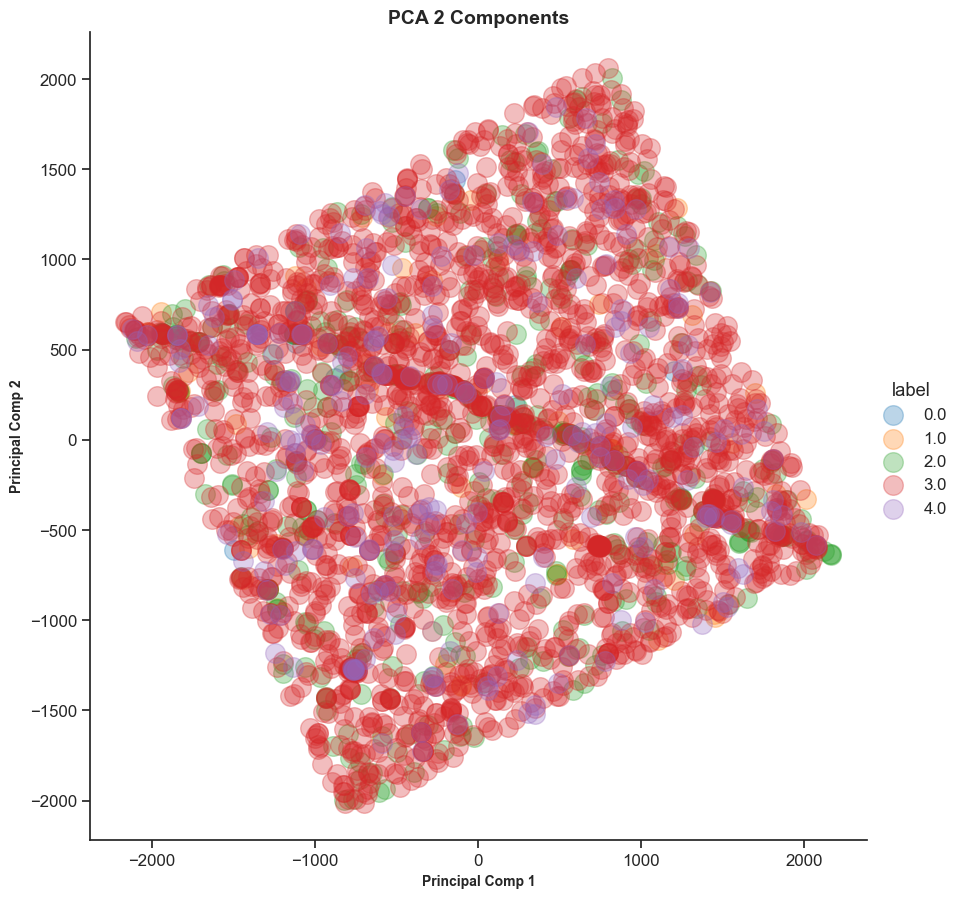

In [163]:
# Menggunakan PCA dengan 2 komponen utama
pca2 = PCA(n_components = 2)
digits_pca2 = pca2.fit_transform(X)

# Membuat DataFrame dari hasil PCA dengan 2 komponen utama
digits_pca2 = pd.DataFrame(data = digits_pca2, columns = ['comp1', 'comp2'])
digits_pca2['label'] = y

# Mengatur gaya scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Membuat scatterplot dari DataFrame
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

# Mengatur judul dan label variabel pada plot visualisasi
plt.title('PCA 2 Components', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

## TSNE 2 Components

c:\Users\LENOVO GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\LENOVO GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\Users\LENOVO GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


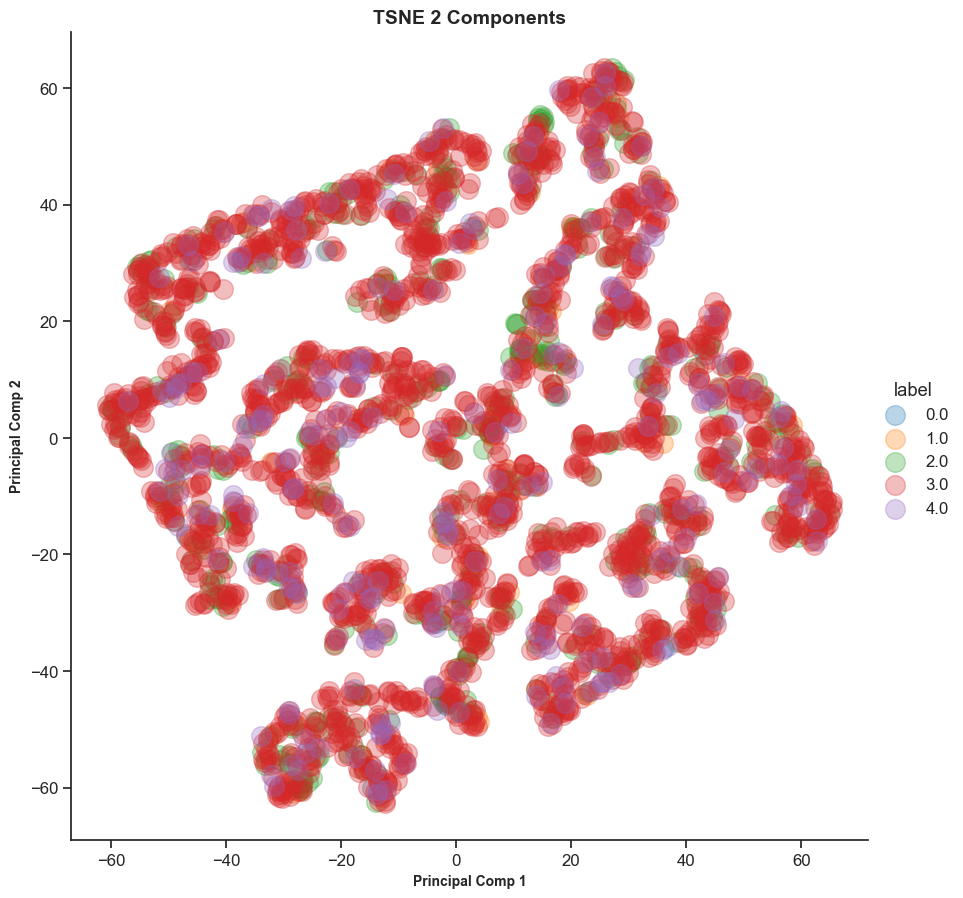

In [164]:
# Menggunakan TSNE dengan 2 komponen utama
tsne2 = TSNE(n_components = 2)
digits_tsne2 = tsne2.fit_transform(X)

# Membuat DataFrame dari hasil TSNE dengan 2 komponen utama
digits_tsne2 = pd.DataFrame(data = digits_tsne2, columns = ['comp1', 'comp2'])
digits_tsne2['label'] = y

# Mengatur gaya scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Membuat scatterplot dari DataFrame
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_tsne2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

# Mengatur judul dan label variabel pada plot visualisasi
plt.title('TSNE 2 Components', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

## TSNE 3 Components

c:\Users\LENOVO GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\LENOVO GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


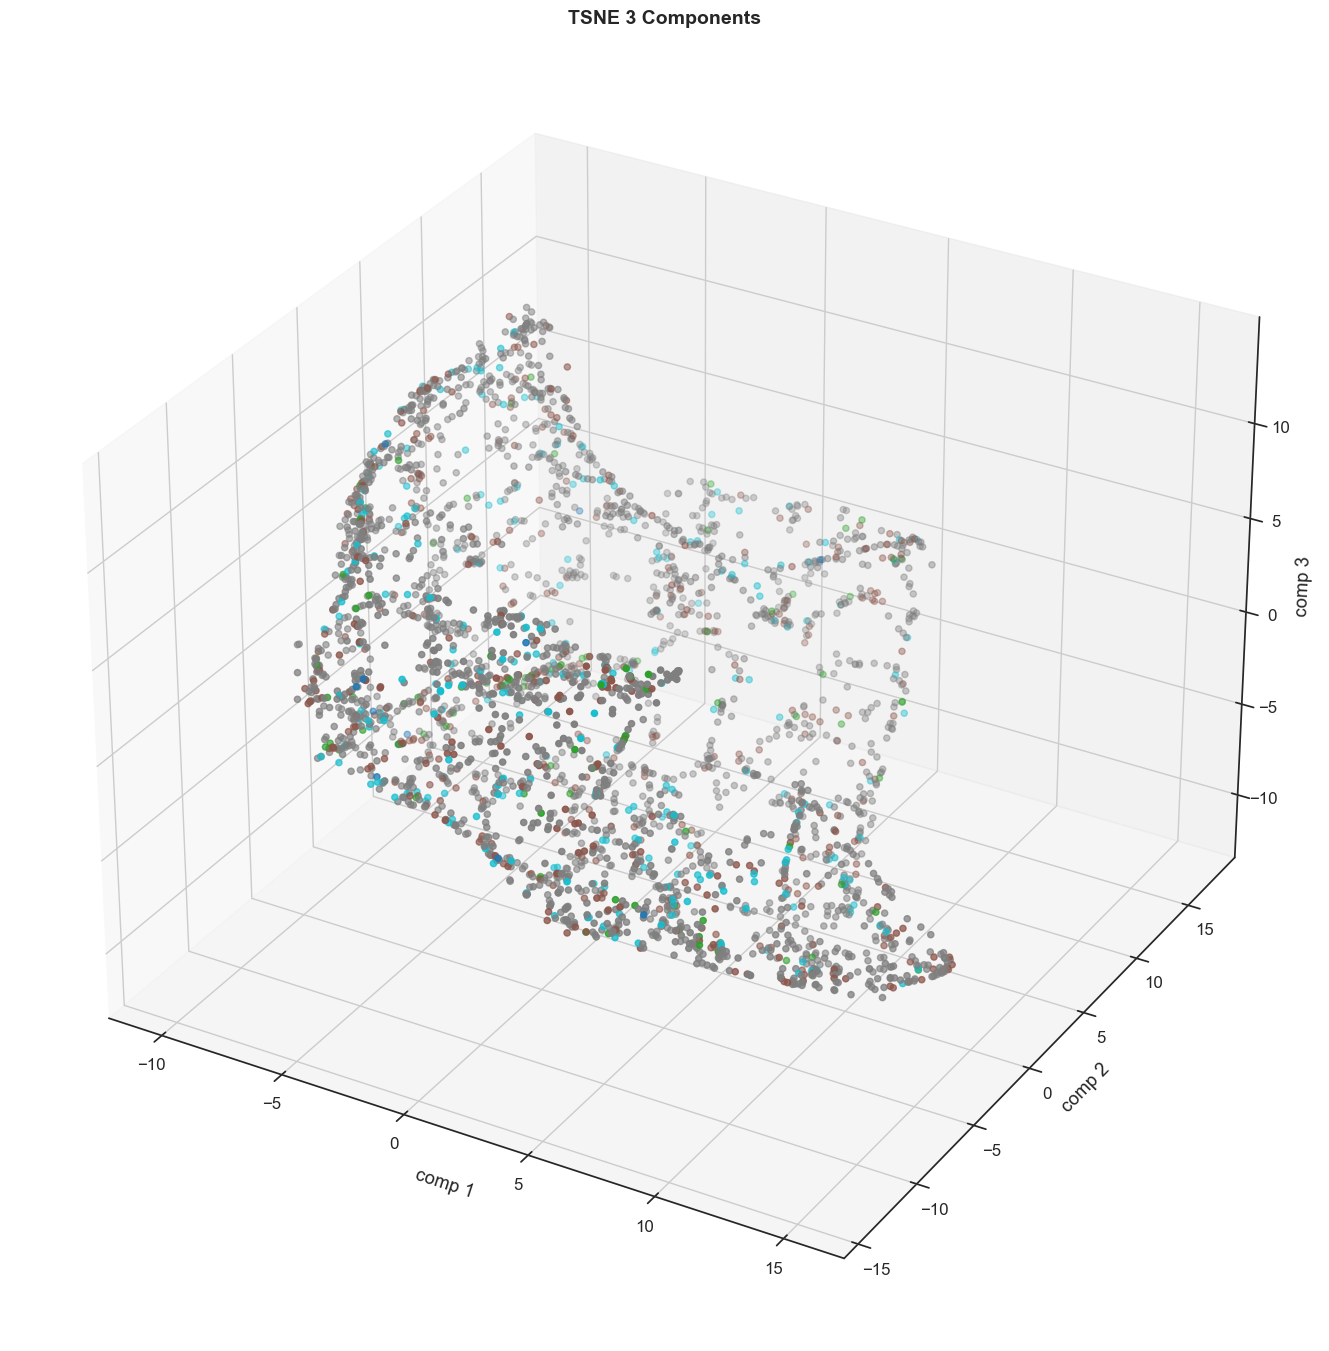

In [165]:
# Menggunakan TSNE dengan 3 komponen utama
tsne3 = TSNE(n_components = 3)
digits_tsne3 = tsne3.fit_transform(X)

# Membuat DataFrame dari hasil TSNE dengan 3 komponen utama
digits_tsne3 = pd.DataFrame(data = digits_tsne3, columns = ['comp1', 'comp2', 'comp3'])
digits_tsne3['label'] = y

# Membuat plot 3D berdasarkan 3 komponen utama
plt.figure(figsize = (20, 17))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_tsne3.loc[:, 'comp1'],
    ys=digits_tsne3.loc[:, 'comp2'],
    zs=digits_tsne3.loc[:, 'comp3'],
    c=digits_tsne3.loc[:, 'label'],
    cmap='tab10'
)

# Mengatur judul dan label variabel pada plot visualisasi
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE 3 Components', weight='bold').set_fontsize('14')
plt.show()